# Принятие решений в бизнесе

# Описание данных

Данные для первой части
Файл /datasets/hypothesis.csv.

•	Hypothesis — краткое описание гипотезы;

•	Reach — охват пользователей по 10-балльной шкале;

•	Impact — влияние на пользователей по 10-балльной шкале;

•	Confidence — уверенность в гипотезе по 10-балльной шкале;

•	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

Данные для второй части
Файл /datasets/orders.csv.

•	transactionId — идентификатор заказа;

•	visitorId — идентификатор пользователя, совершившего заказ;

•	date — дата, когда был совершён заказ;

•	revenue — выручка заказа;

•	group — группа A/B-теста, в которую попал заказ

Файл /datasets/visitors.csv.

•	date — дата;

•	group — группа A/B-теста;

•	visitors — количество пользователей в указанную дату в указанной группе A/B-теста


# Описание проекта
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача

•	Применить фреймворк ICE для приоритизации гипотез. 

•	Применить фреймворк RICE для приоритизации гипотез. 

•	Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE.

Часть 2. Анализ A/B-теста
Проведен A/B-тест и получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача

Проанализировать A/B-тест

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats as st
import numpy as np 
import datetime as dt

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv(
    '/datasets/visitors.csv', sep=','
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


Изучить датасет hypothesis

In [3]:
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
hypothesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [6]:
hypothesis.duplicated().sum()

0

Изучить датасет orders

In [7]:
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [8]:
orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace=True)

In [9]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [10]:
orders.duplicated().sum()

0

In [11]:

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
visitors.info()
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [13]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [14]:
visitors.duplicated().sum()

0

In [15]:

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Строки приведены к нижнему регистру, пропусков и дубликатов не обнаружено

# Часть 1. Приоритизация гипотез

•	Применить фреймворк ICE для приоритизации гипотез (по убыванию приоритета).

In [16]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Получен перечень гипотез, отсортированный по убыванию оценки ICE. В топ 5 входят гипотезы с индексами 8, 0, 7, 6 и 2.

•	Применить фреймворк RICE для приоритизации гипотез (по убыванию приоритета). 

In [17]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Изменение порядка гипотез по фреймворку RICE. Топ 5 : 7, 2, 0, 6, и 8.

•	Изменение приоритизации гипотез при применении RICE вместо ICE

In [18]:
hypothesis[['hypothesis','ICE', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,ICE,RICE
7,Добавить форму подписки на все основные страни...,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000,3.0


Формулы разнятся - RICE учитывает охват, а ICE нет, поэтому изменилась приоритизация гипотез

ICE: Самые топовые гипотезы по ICE - это гипотезы "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

RICE: Самые топовые гипотезы по RICE - гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала увеличения трафика, что позволит привлекать на 30% больше пользователей". 

По обоим фреймворкам самая топовая гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

# Часть 2. Анализ A/B-теста

1.	Построить график кумулятивной выручки по группам

In [19]:
datesGroups = orders[['date','group']].drop_duplicates()

In [20]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[ 
        np.logical_and( 
            orders['date'] <= x['date'], orders['group'] == x['group'] 
        )
    ].agg({ 
        'date': 'max', 
        'group': 'max', 
        'transaction_id': pd.Series.nunique, 
        'visitor_id': pd.Series.nunique, 
        'revenue': 'sum' 
    }
    ),
    axis=1, 
).sort_values(by=['date', 'group'])

In [21]:
ordersAggregated.columns=[
    'date',
    'group',
    'orders',
    'buyers',
    'revenue'
]

ordersAggregated.head()

,date,group,orders,buyers,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


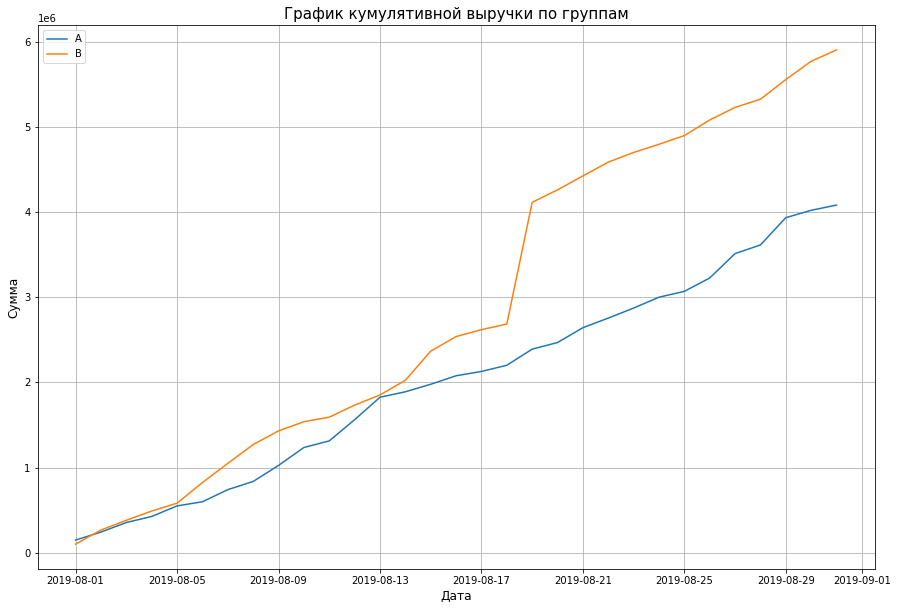

In [22]:
plt.figure(figsize=(15, 10))
plt.grid(axis='both')
plt.title('График кумулятивной выручки по группам', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Сумма', fontsize=12)


plt.plot(
    ordersAggregated[ordersAggregated['group'] == 'A']['date'], 
    ordersAggregated[ordersAggregated['group'] == 'A']['revenue'],
    label='A')

plt.plot(
    ordersAggregated[ordersAggregated['group'] == 'B']['date'], 
    ordersAggregated[ordersAggregated['group'] == 'B']['revenue'],
    label='B')

plt.legend()
plt.show()


Таким образом, в целом кумулятивная выручка в группе "В" растет выше
Скачок от 18-19 августа скорее обусловлен каким-то непрогнозируемым колебанием, поэтому имеет смысл изучить дополнительно или увеличить длительность теста.

2.	Построить график кумулятивного среднего чека по группам

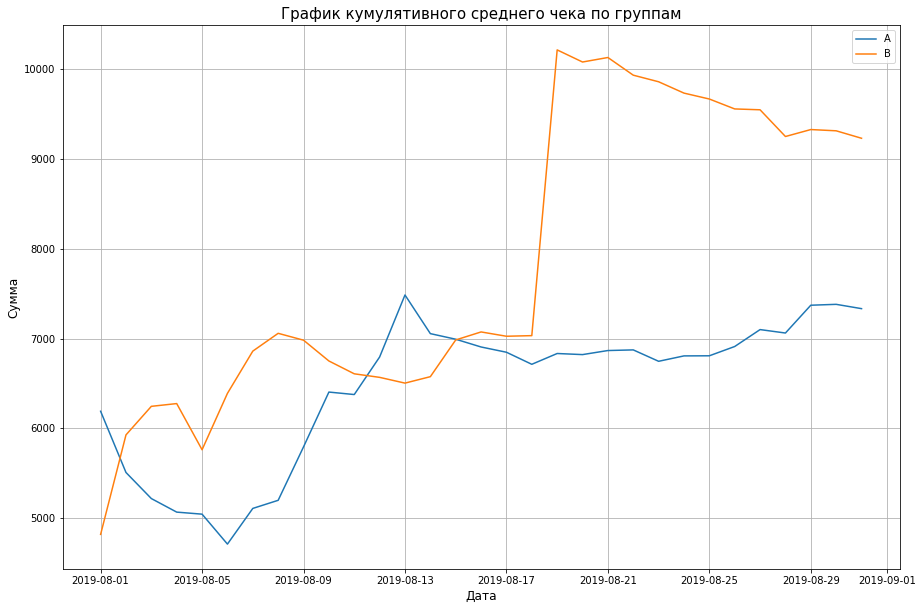

In [23]:
plt.figure(figsize=(15, 10))
plt.grid(axis='both')
plt.title('График кумулятивного среднего чека по группам', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Сумма', fontsize=12)

plt.plot(
    ordersAggregated[ordersAggregated['group'] == 'A']['date'], 
    ordersAggregated[ordersAggregated['group'] == 'A']['revenue']/ordersAggregated[ordersAggregated['group'] == 'A']['orders'],
    label='A')

plt.plot(
    ordersAggregated[ordersAggregated['group'] == 'B']['date'], 
    ordersAggregated[ordersAggregated['group'] == 'B']['revenue']/ordersAggregated[ordersAggregated['group'] == 'B']['orders'],
    label='B')

plt.legend()
plt.show()

В начале средний чек в группе В показал заметный рост на фоне снижения чека в группе А 
Между 5 и 11 августа можно наблюдать последовательный рост среднего чека сначала в группе А, а потом в группе В. С 13 августа заметно снижение среднего чека группы В и пиковое значение метрики для группы А. Необходимо продолжать тест дальше. с 18 августа на графике изменения среднего чека произошел резкий скачок суммы среднего чека группы В. 
Далее произошел рост А при снижении чека группы В, но значительный разрыв между группами сохраняется.

3.	Построить график относительного изменения кумулятивного среднего чека группы B к группе A

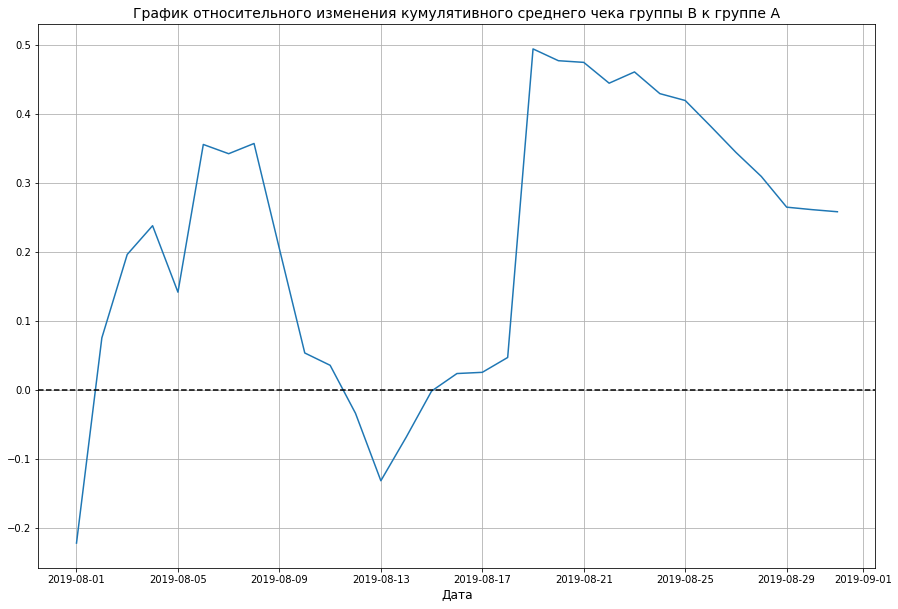

In [24]:
cumulativeRevenueA = ordersAggregated[ordersAggregated['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = ordersAggregated[ordersAggregated['group'] == 'B'][['date', 'revenue', 'orders']]
cumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 10))
plt.grid(axis='both')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', 
          fontsize=14)

plt.plot(
    cumulativeRevenue['date'],
    ((cumulativeRevenue['revenueB'] / cumulativeRevenue['ordersB'])/(cumulativeRevenue['revenueA'] / cumulativeRevenue['ordersA'])-1)
)

plt.xlabel('Дата', fontsize=12)

plt.axhline(y=0, color='black', linestyle='--')

plt.show()

Слишком резкие колебания, необходимо проверить данные на наличие аномальных пользователей. Все три графика демонстрируют схожую картину.

4.	Построить график кумулятивного среднего количества заказов на посетителя по группам

In [25]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({
        'date': 'max',
        'group': 'max',
        'visitors': 'sum'
    }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [26]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [27]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

In [28]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

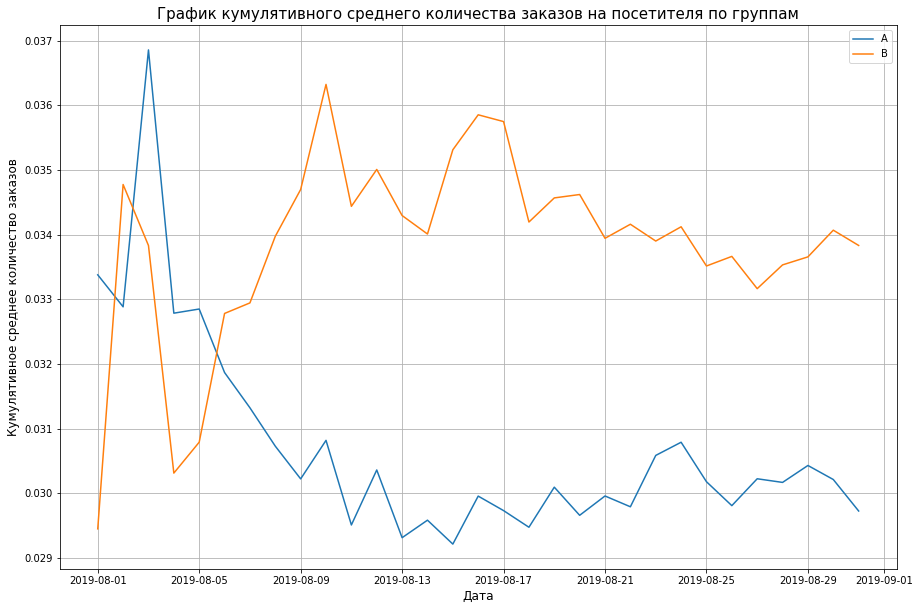

In [29]:
plt.figure(figsize=(15, 10))
plt.grid(axis='both')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=15)

plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивное среднее количество заказов', fontsize=12)

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')


plt.legend()
plt.show()

В начале наблюдаются сильные колебания среднего количества заказов в обеих группах, однако с 6 августа данные "выровнялись".Таким образом, показатели группы В более привлекательны.

5.	Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

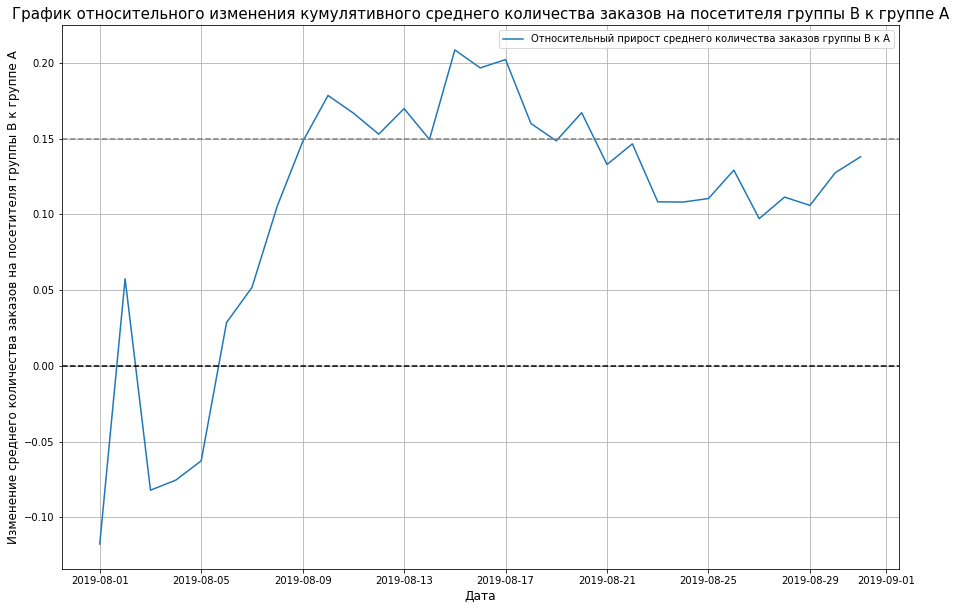

In [30]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 10))
plt.grid(axis='both')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', 
          fontsize=15)

plt.xlabel('Дата', fontsize=12)
plt.ylabel('Изменение среднего количества заказов на посетителя группы B к группе A', fontsize=12)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост среднего количества заказов группы B к A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.show();


Как и в предыдущих графиках, которые были изучены ранее, можно заметить период колебаний с 1 по 6 августа. В этот период наблюдаются резкие скачки отношения данных группы В к группе А.
С 6 августа наблюдается тенденция к росту разрыва между среднего количества заказов двух групп до 17 августа - далее наблюдается небольшое снижение показателя группы В.  

6.	Построить точечный график количества заказов по пользователям

In [31]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns =  ['visitor_id', 'orders']


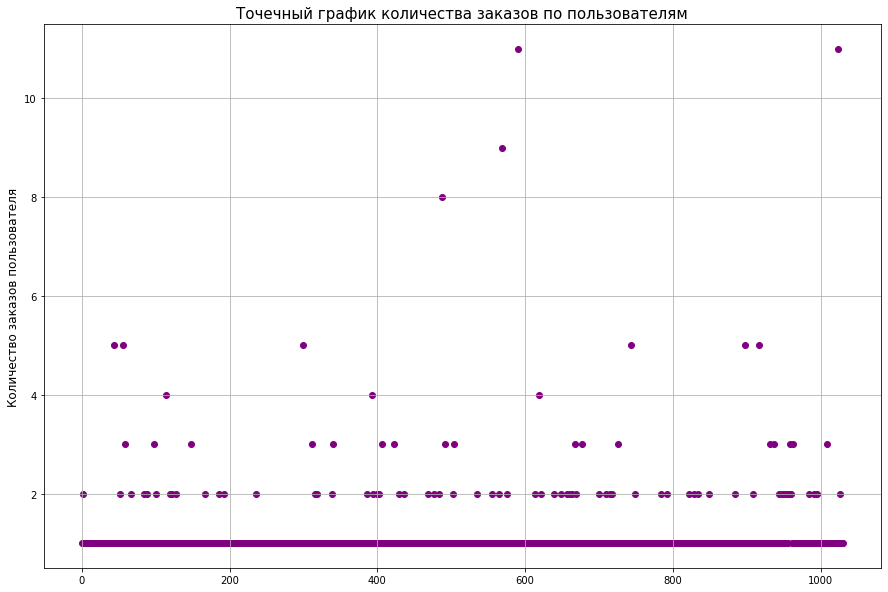

In [32]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(15, 10))
plt.grid(axis='both')
plt.title('Точечный график количества заказов по пользователям', fontsize=15)

plt.ylabel('Количество заказов пользователя', fontsize=12)

plt.scatter(x_values, ordersByUsers['orders'], color = 'purple')

plt.show()

Таким образом, бОльшая часть людей совершает покупку один раз, но часты случаи 2-3 заказов.

7.	Посчитать 95-й и 99-й перцентили количества заказов на пользователя. 

In [33]:
print('95 перцентиль: %.2f' % (np.percentile(ordersByUsers['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(ordersByUsers['orders'], [99])))

95 перцентиль: 2.00
99 перцентиль: 4.00


Не более 5% пользователей совершали больше 2-х покупок, а 1% - четыре и более.
Принять за верхнюю границу 4 заказа на одного пользователя.

8.	Построить точечный график стоимостей заказов

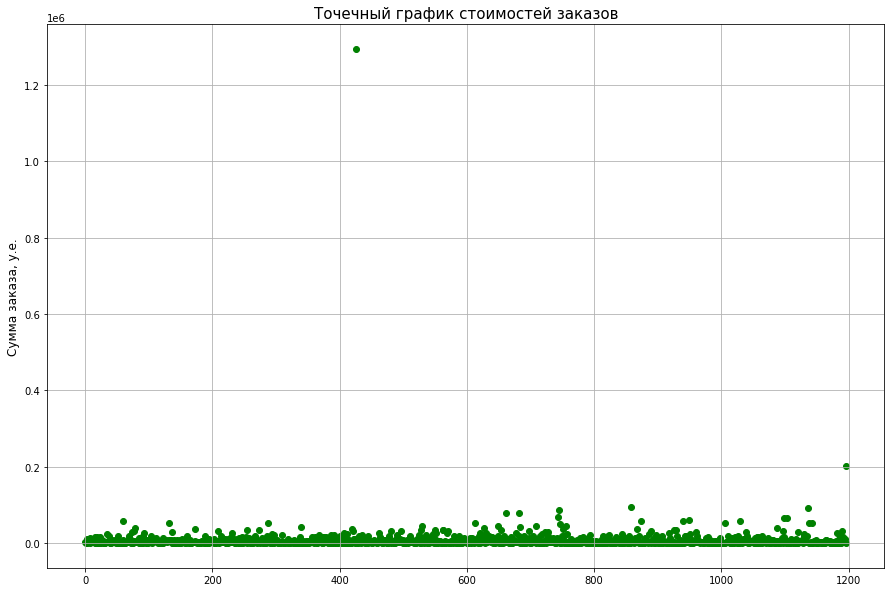

In [34]:
x_values = pd.Series(range(0, len(orders)))

plt.figure(figsize=(15, 10))
plt.grid(axis='both')
plt.title('Точечный график стоимостей заказов', fontsize=15)

plt.ylabel('Сумма заказа, у.е.', fontsize=12)

plt.scatter(x_values, orders['revenue'], color = 'green')

plt.show()

На графике бросаются в глаза 2 выброса с большим объемом закупки, возможно это крупные предприятия покупали оптом.

9.	Посчитать 95-й и 99-й перцентили стоимости заказов 

In [35]:
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

95 перцентиль: 28000.00
99 перцентиль: 58233.20


In [36]:
orders['revenue'].max()

1294500

Возможно это была единоразовая крупная покупка на сумму 1294500.
Все что за пределами 99 процентиля - аномальные значения.

10.	Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

In [37]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersADaily', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersADaily': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = ['date','ordersACummulative','revenueCummulativeA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersBDaily', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersBDaily': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersBCummulative.columns = ['date','ordersBCummulative','revenueCummulativeB']


data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersADaily,revenuePerDateA,ordersBDaily,revenuePerDateB,ordersACummulative,revenueCummulativeA,ordersBCummulative,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


•	date — дата;

•	ordersPerDateA — количество заказов в выбранную дату в группе A;

•	revenuePerDateA — суммарная выручка в выбранную дату в группе A;

•	ordersPerDateB — количество заказов в выбранную дату в группе B;

•	revenuePerDateB — суммарная выручка в выбранную дату в группе B;

•	ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;

•	revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;

•	ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;

•	revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;

•	visitorsPerDateA — количество пользователей в выбранную дату в группе A;

•	visitorsPerDateB — количество пользователей в выбранную дату в группе B;

•	visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;

•	visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.


Создать переменные ordersByUsersA и ordersByUsersB со столбцами ['visitor_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [38]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

Объявить переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.


H0: Статистически значимых различий по количеству заказов между группами нет

H1: Статистически значимые различия по количеству заказов между группами есть

Уровень значимости alpha = .05

Так как в данной работе не были проверены данные на нормальность распределения, поэтому используется непараметрический статистический критерий Манна-Уитни, предназначенный для выявления различий показателей в двух несвязных выборках.

In [39]:
sampleA = pd.concat([ordersByUsersA['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitorsPerDateA'].sum() - 
                                          len(ordersByUsersA['orders'])), 
                          name='orders')],axis=0
                    )

sampleB = pd.concat([ordersByUsersB['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitorsPerDateB'].sum() - 
                                          len(ordersByUsersB['orders'])), 
                          name='orders')],axis=0
                    )
alpha = .05 
results = st.mannwhitneyu(sampleA, sampleB)


print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('Относительный выигрыш группы B:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-значение:  0.017
Отвергаем нулевую гипотезу
Относительный выигрыш группы B: 0.138


По «сырым» данным статистически значимые различия по среднему количеству заказов в группах A и B есть. 
Первое число — p-value = 0.017 меньше 0.05. Относительный выигрыш группы B равен 13.8%.


11.	Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Теперь необходимо проверить статистическую значимость различий в среднем чеке между сегментами.

H0: Статистически значимых различий по средним чекам между группами нет

H1: Статистически значимые различия по средним чекам между группами есть

Чтобы рассчитать статистическую значимость различий в среднем чеке, критерию mannwhitneyu() передать данные о выручке с заказов. 


In [40]:
alpha = .05 
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('p-значение: ','{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('Относительный прирост В к А:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


p-значение:  0.729
Не получилось отвергнуть нулевую гипотезу
Относительный прирост В к А: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B выше среднего чека группы A (25.9%).

12.	Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [41]:
ManyOrders = np.percentile(ordersByUsers['orders'], 99)
ExpensiveOrders = np.percentile(orders['revenue'], 99)


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > ManyOrders]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > ManyOrders]['visitor_id'],
    ],
    axis=0,
)


usersWithExpensiveOrders = orders[orders['revenue'] > ExpensiveOrders]['visitor_id']


abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
abnormalUsers.shape[0]

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64

15

Всего 15 аномальных пользователей. 
Необходимо узнать, как их действия повлияли на результаты теста. Посчитать статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовить выборки количества заказов по пользователям по группам теста:


In [42]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 


H0: Статистически значимых различий по количеству заказов между группами нет

H1: Статистически значимые различия по количеству заказов между группами есть

In [43]:
alpha = .05 
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)


print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('Относительный выигрыш группы B:', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение:  0.014
Отвергаем нулевую гипотезу
Относительный выигрыш группы B: 0.153


Результаты по среднему количеству заказов практически не изменились. 

13.	Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

H0: Статистически значимых различий по средним чекам между группами нет

H1: Статистически значимые различия по средним чекам между группами есть 

In [44]:
alpha = .05 
results = st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )

print('p-значение: ', "{0:.3f}".format(results.pvalue))
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('Относительный прирост В к А:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


p-значение:  0.851
Не получилось отвергнуть нулевую гипотезу
Относительный прирост В к А: -0.006


P-value увеличился, но средний чек группы B стал меньше среднего чека группы A, слишком дорогие заказы (аномалии) повлияли на результаты A/B-теста.


14.	Принять решение по результатам теста и объяснить его

•	Существует статистически значимые различия по среднему количеству заказов между группами по «сырым» и по данным после фильтрации аномалий;

•	Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

Однако аномалии в средних чеках заметно повлияли на результаты теста.

Поэтому необходимо:

1. Зафиксировать успех и завершить тест, если цель - рост конверсии.

2.	Продолжить тест, если изначальная цель - рост среднего чека, так как наблюдаются колебания суммы среднего чека на графиках (аномалии). Возможно продолжительность теста недостаточна для однозначной фиксации результата. Однако группа В заметно лидирует, результаты по количеству заказов дают это понять. Поэтому есть смысл надеяться на стабилизацию чека в ближайшие дни и останавливать тест, который идет уже месяц.